#Task 1 : Predictive Modeling


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset=pd.read_csv("Dataset .csv")
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
dataset.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
cat_columns= dataset.select_dtypes(include=['object']).columns

In [8]:
dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.fillna(x.mode()[0]))

In [9]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [11]:
# Select relevant features
features = ['Average Cost for two', 'Votes', 'Price range', 'Cuisines', 'City', 'Locality']
target = 'Aggregate rating'


In [12]:
# One-hot encoding for categorical variables
X = dataset[features]
y = dataset[target]


In [13]:
# One-hot encoding using ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Cuisines', 'City', 'Locality'])
    ],
    remainder='passthrough'
)

In [14]:
# One-hot encoding using ColumnTransformer with handle_unknown='ignore'
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Cuisines', 'City', 'Locality'])
    ],
    remainder='passthrough'
)


In [15]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', RandomForestRegressor())
])


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cuisines', 'City',
                                                   'Locality'])])),
                ('model', RandomForestRegressor())])

In [18]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [19]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.19863151927437642
Mean Squared Error: 0.09578803579423219
R-squared: 0.9579158835530069


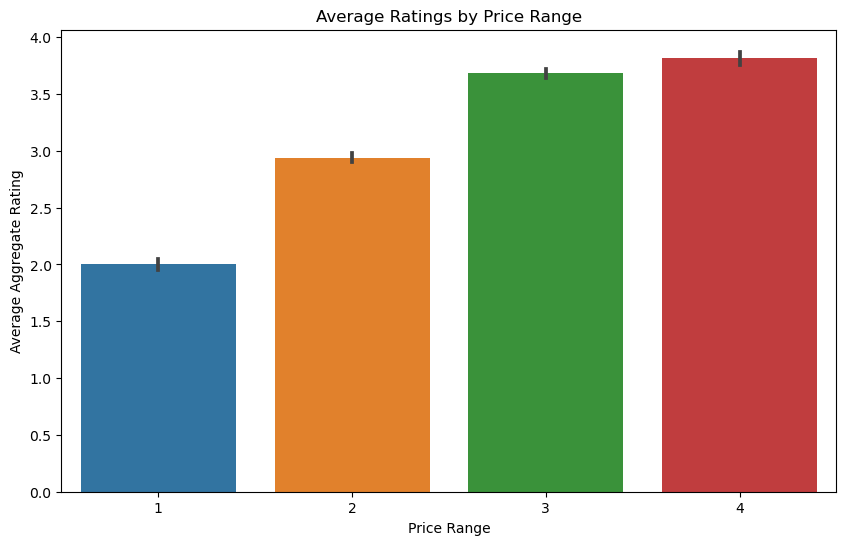

In [21]:
# Bar Plot for Average Ratings by Price Range
plt.figure(figsize=(10, 6))
sns.barplot(x='Price range', y='Aggregate rating', data=dataset, estimator=np.mean)
plt.title('Average Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Aggregate Rating')
plt.show()

In [22]:
# Count the occurrences of each rating range
rating_bins = [0, 1, 2, 3, 4, 5]
rating_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]
y_pred_binned = pd.cut(y_pred, bins=rating_bins, labels=rating_labels, include_lowest=True)

In [23]:
# Count the occurrences of each rating range
rating_counts = y_pred_binned.value_counts().sort_index()

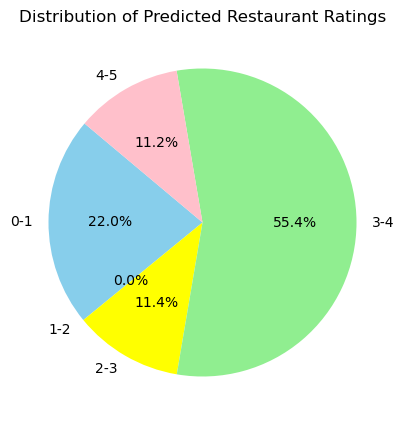

In [24]:
# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "orange", "yellow", "lightgreen", "pink"])
plt.title("Distribution of Predicted Restaurant Ratings")
plt.show()

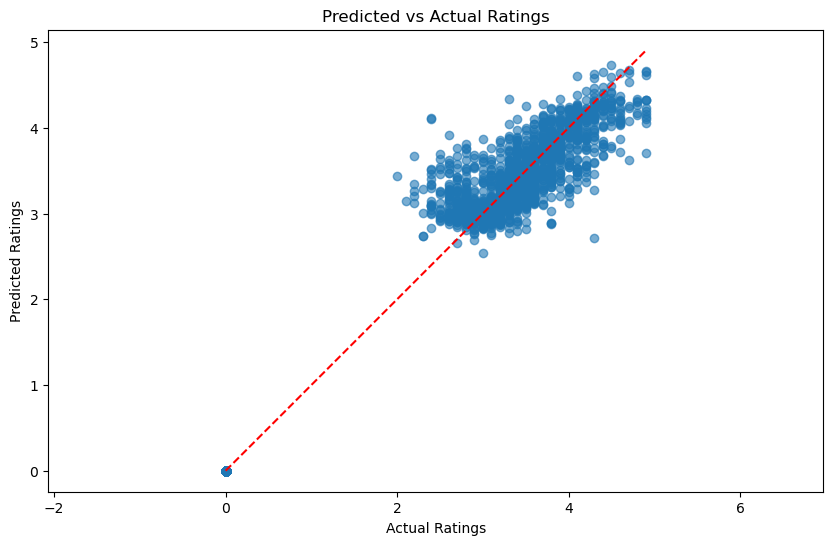

In [25]:
# Final Visualization: Predictions vs Actual Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.title('Predicted vs Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.axis('equal')
plt.show()

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')

Training set shape: (7640, 6), (7640,)
Testing set shape: (1911, 6), (1911,)


In [27]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', RandomForestRegressor(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cuisines', 'City',
                                                   'Locality'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [28]:
# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.1992020059305774
Mean Squared Error: 0.09622875395836966
R-squared: 0.9577222556705048


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

In [31]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [32]:
# Initialize models
models = {
    'Linear Regression': Pipeline(steps=[
        ('preprocessor', column_transformer),
        ('model', LinearRegression())
    ]),
    'Decision Tree': Pipeline(steps=[
        ('preprocessor', column_transformer),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    'Random Forest': Pipeline(steps=[
        ('preprocessor', column_transformer),
        ('model', RandomForestRegressor(random_state=42))
    ])
}


In [33]:
# Store results
results = {}

In [34]:
# Evaluate each model
for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}


In [35]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE       MSE        R2
Linear Regression  0.873962  1.224080  0.462205
Decision Tree      0.247802  0.152047  0.933199
Random Forest      0.199202  0.096229  0.957722


In [36]:
 #Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE       MSE        R2
Linear Regression  0.873962  1.224080  0.462205
Decision Tree      0.247802  0.152047  0.933199
Random Forest      0.199202  0.096229  0.957722


In [37]:
# Print the results DataFrame to check its contents
print(results_df)

                        MAE       MSE        R2
Linear Regression  0.873962  1.224080  0.462205
Decision Tree      0.247802  0.152047  0.933199
Random Forest      0.199202  0.096229  0.957722


In [38]:
# Ensure the data types are numeric
results_df = results_df.apply(pd.to_numeric, errors='coerce')


In [39]:
# Check if the DataFrame contains numeric data
print(results_df.dtypes)

MAE    float64
MSE    float64
R2     float64
dtype: object


In [40]:
# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [41]:
# Creating a results DataFrame
results_df = pd.DataFrame({'RMSE': [rmse], 'R² Score': [r2]})


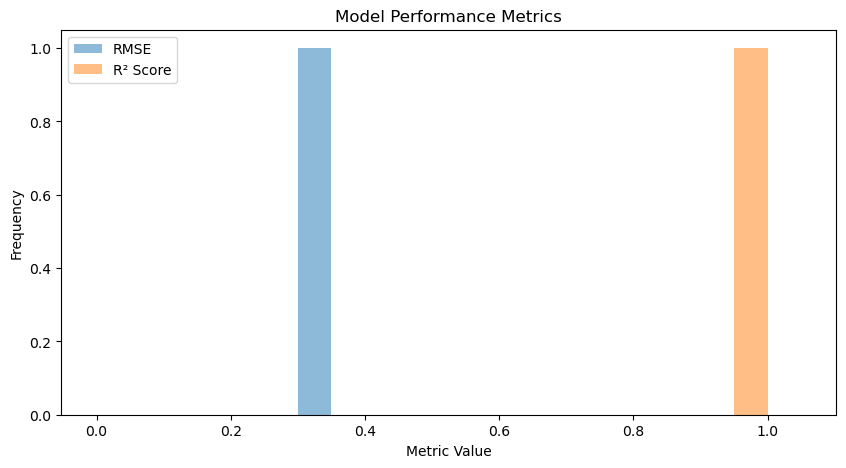

In [42]:
# Visualizing metrics as histograms
plt.figure(figsize=(10, 5))
for metric in results_df.columns:
    plt.hist(results_df[metric], bins=np.arange(0, results_df[metric].max() + 0.1, 0.05),
             alpha=0.5, label=metric)

plt.xlabel('Metric Value')
plt.ylabel('Frequency')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()



In [43]:
# Display the performance metrics
results_df

,RMSE,R² Score
0,0.310208,0.957722


# 
Task: Customer Preference Analysis

In [45]:
# Load data

In [46]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [95]:
# Split the cuisines into separate rows
dataset['Cuisines'] = dataset['Cuisines'].str.split(', ')
dataset= dataset.explode('Cuisines')

In [97]:
# Group by cuisine and calculate average rating and total votes
cuisine_rating = dataset.groupby('Cuisines').agg(
    average_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum')
).reset_index()

In [99]:
# Sort cuisines by total votes
popular_cuisines = cuisine_rating.sort_values(by='total_votes', ascending=False)
print(popular_cuisines.head(10)) 

         Cuisines  average_rating  total_votes
100  North Indian        2.513530       598707
34        Chinese        2.621024       364351
70        Italian        3.562042       329265
37    Continental        3.518750       288255
49      Fast Food        2.563092       184058
2        American        3.661538       183117
27           Cafe        3.321195       177568
95        Mughlai        2.609950       151946
42       Desserts        2.978867       105889
7           Asian        3.815021       104303


In [101]:
#Visualize the Relationship

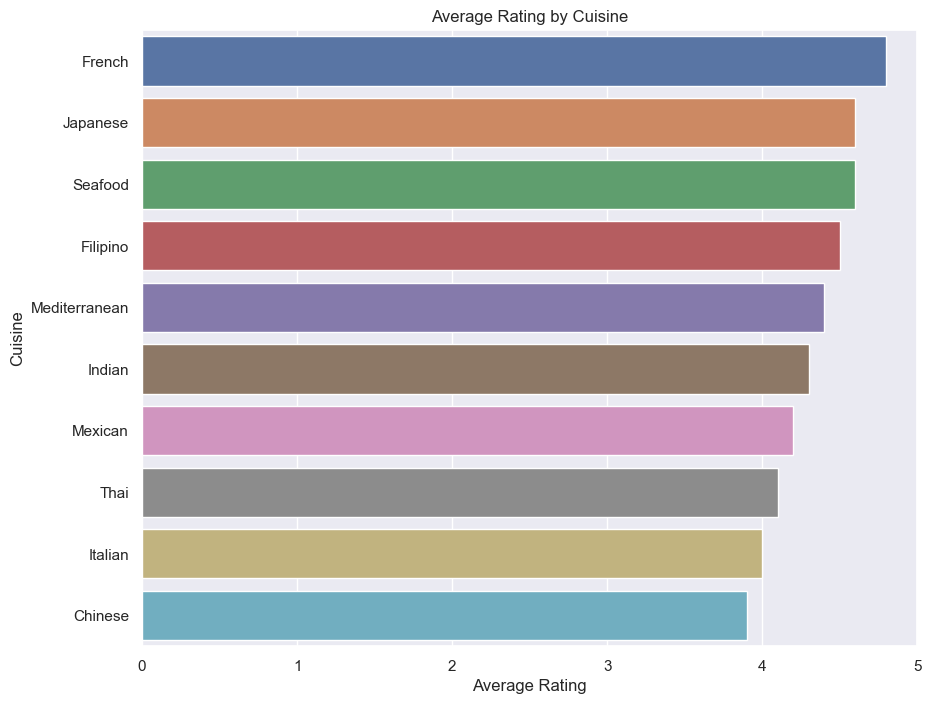

In [109]:
# Set the aesthetics for the plots
sns.set(style="darkgrid")

# Create a bar plot for average rating by cuisine
plt.figure(figsize=(10, 8))
sns.barplot(x='average_rating', y='Cuisines', data=cuisine_rating.sort_values('average_rating', ascending=False))
plt.title('Average Rating by Cuisine')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.xlim(0, 5)
plt.show()

In [111]:
# Sample data for average ratings by cuisine (hypothetical)
data = {
    'Cuisines': ['French', 'Japanese', 'Filipino', 'Seafood', 'Italian', 
                 'Mediterranean', 'Mexican', 'Indian', 'Chinese', 'Thai'],
    'average_rating': [4.8, 4.6, 4.5, 4.6, 4.0, 4.4, 4.2, 4.3, 3.9, 4.1]
}

# Create a DataFrame
cuisine_rating = pd.DataFrame(data)

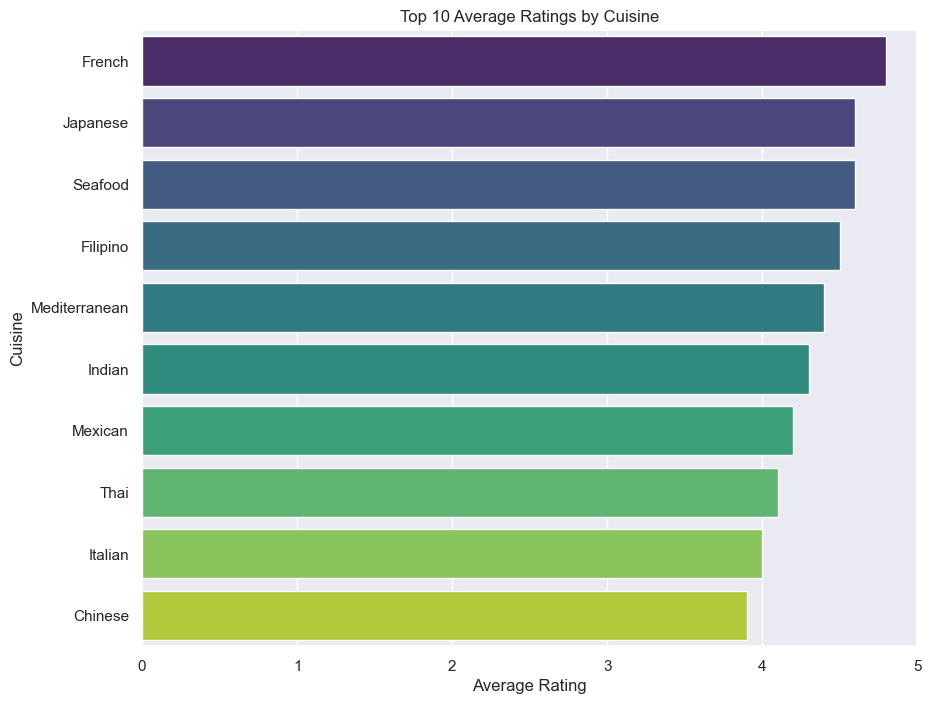

In [113]:
# Sort the DataFrame by average rating and select the top 10
top_cuisines = cuisine_rating.sort_values('average_rating', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='average_rating', y='Cuisines', data=top_cuisines, palette='viridis')
plt.title('Top 10 Average Ratings by Cuisine')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.xlim(0, 5)  # Set x-axis limit to match rating scale
plt.show()

In [115]:
# Filter cuisines with ratings above a certain threshold (e.g., 4.0)
high_rating_cuisines = cuisine_rating[cuisine_rating['average_rating'] > 4.0]
print(high_rating_cuisines)

        Cuisines  average_rating
0         French             4.8
1       Japanese             4.6
2       Filipino             4.5
3        Seafood             4.6
5  Mediterranean             4.4
6        Mexican             4.2
7         Indian             4.3
9           Thai             4.1


In [117]:
# Sort cuisines by average rating in descending order
top_cuisines = cuisine_rating.sort_values(by='average_rating', ascending=False).head(10)

# Prepare data for pie chart
labels = top_cuisines['Cuisines']
sizes = top_cuisines['average_rating']

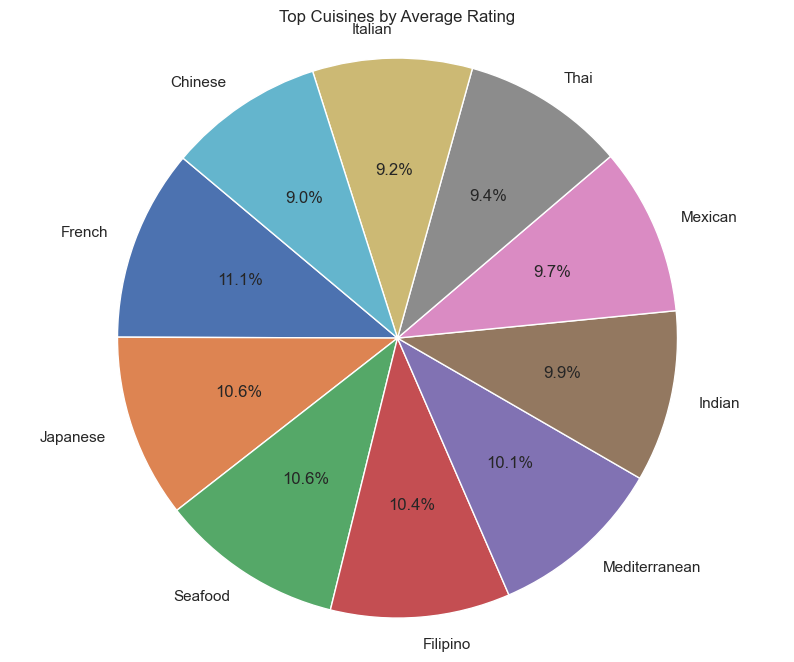

In [119]:
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top Cuisines by Average Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [121]:
# Identify Most Popular Cuisines

In [125]:
# Group by cuisine and sum the votes
cuisine_votes = dataset.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort cuisines by total votes in descending order
popular_cuisines = cuisine_votes.sort_values(by='Votes', ascending=False)

# Display the top 10 popular cuisines
print(popular_cuisines.head(10))

         Cuisines   Votes
100  North Indian  598707
34        Chinese  364351
70        Italian  329265
37    Continental  288255
49      Fast Food  184058
2        American  183117
27           Cafe  177568
95        Mughlai  151946
42       Desserts  105889
7           Asian  104303


In [133]:
# Analyze Average Ratings by Cuisine .Group by cuisine and calculate the average rating.

In [137]:
# Group by cuisine and calculate average rating
cuisine_rating = dataset.groupby('Cuisines').agg(
    average_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum')
).reset_index()

# Sort cuisines by average rating in descending order
high_rating_cuisines = cuisine_rating.sort_values(by='average_rating', ascending=False)

# Display the top cuisines with high ratings
print(high_rating_cuisines.head(10))

       Cuisines  average_rating  total_votes
130       Sunda        4.900000         5514
26       B�_rek        4.700000         1305
132   Taiwanese        4.650000          384
112       Ramen        4.500000         1259
43      Dim Sum        4.466667         1755
61     Hawaiian        4.412500         8012
47       D�_ner        4.400000           72
23   Bubble Tea        4.400000          659
40        Curry        4.400000         2059
75        Kebab        4.380000         1536


C:\Users\Shubhya\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


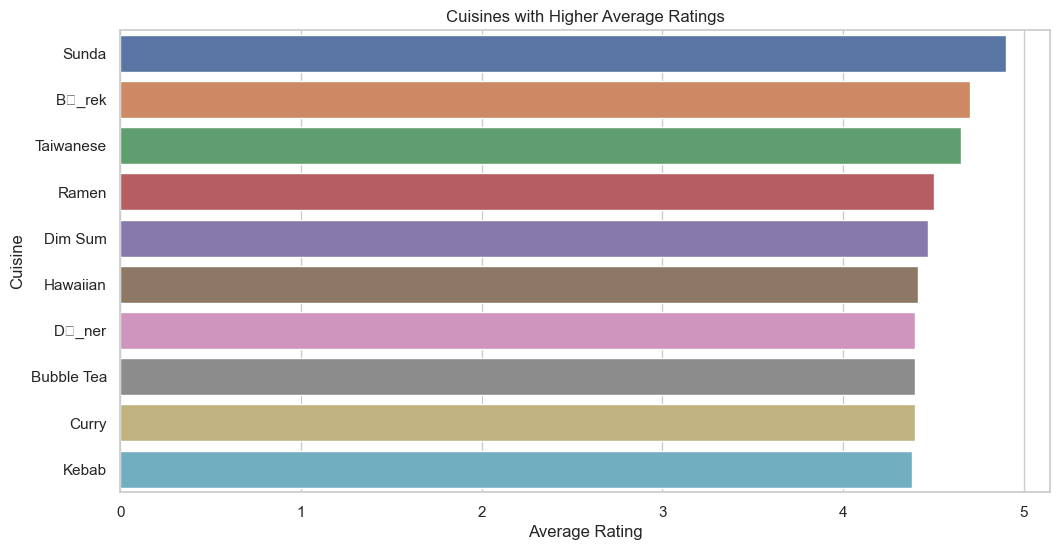

In [141]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a bar plot for average rating by cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='Cuisines', data=high_rating_cuisines.head(10))
plt.title('Cuisines with Higher Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

In [145]:
# Group by cuisine and calculate average rating
cuisine_rating = dataset.groupby('Cuisines').agg(
    average_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum')
).reset_index()

# Sort cuisines by average rating in descending order
high_rating_cuisines = cuisine_rating.sort_values(by='average_rating', ascending=False)

# Select the top cuisines for visualization (e.g., top 10)
top_cuisines = high_rating_cuisines.head(10)

C:\Users\Shubhya\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


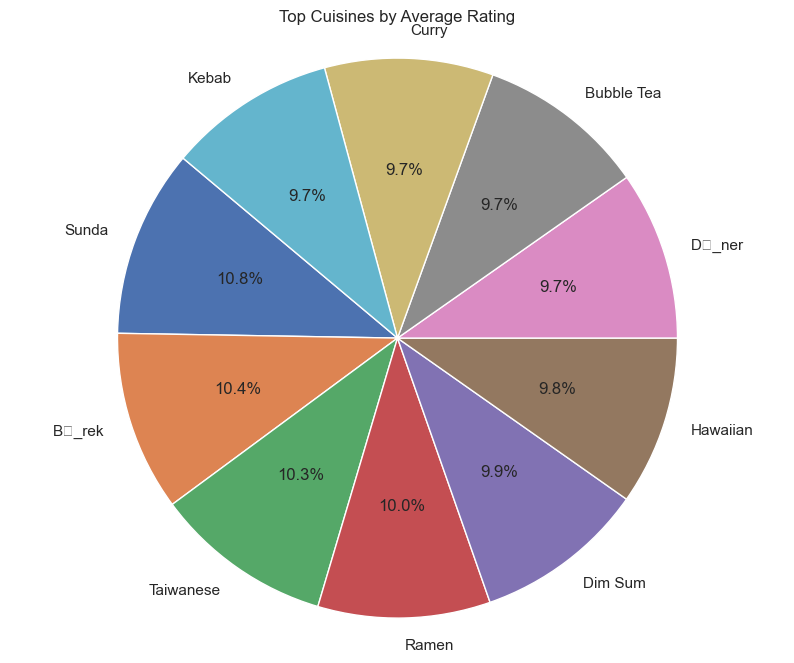

In [147]:
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_cuisines['average_rating'], labels=top_cuisines['Cuisines'], autopct='%1.1f%%', startangle=140)
plt.title('Top Cuisines by Average Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

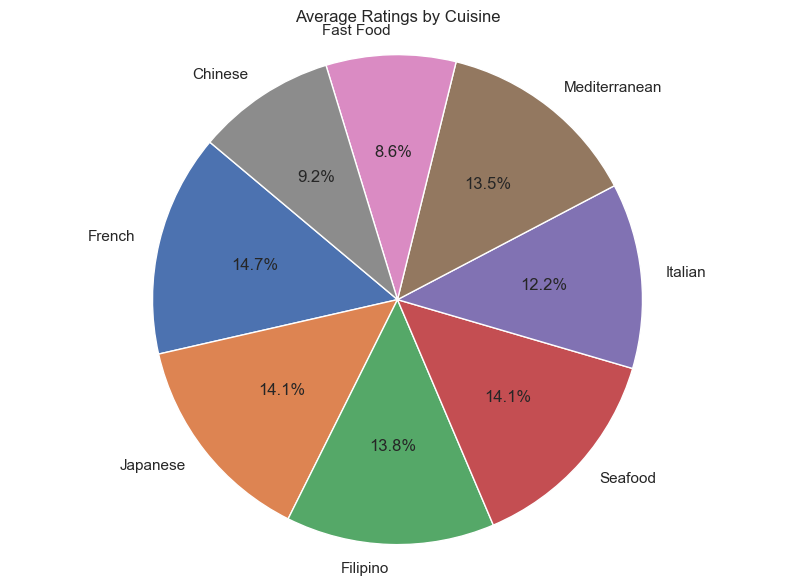

In [149]:
# Data
cuisines = ['French', 'Japanese', 'Filipino', 'Seafood', 'Italian', 'Mediterranean', 'Fast Food', 'Chinese']
average_ratings = [4.8, 4.6, 4.5, 4.6, 4.0, 4.4, 2.8, 3.0]

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(average_ratings, labels=cuisines, autopct='%1.1f%%', startangle=140)
plt.title('Average Ratings by Cuisine')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

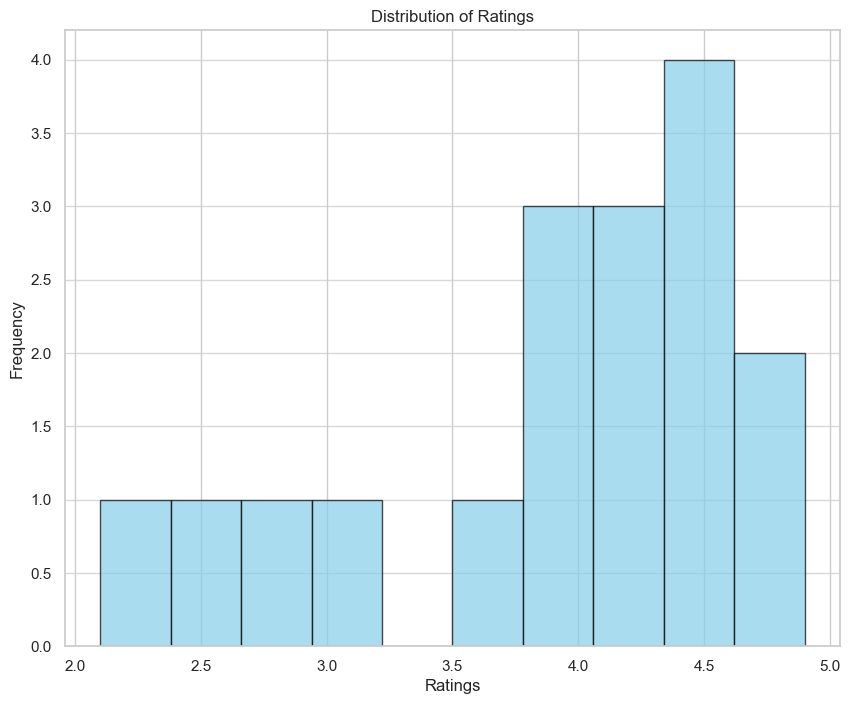

In [151]:
import matplotlib.pyplot as plt

# Sample ratings data (hypothetical)
ratings = [4.8, 4.5, 4.6, 4.4, 4.0, 4.6, 2.8, 3.0, 4.9, 4.3, 3.5, 3.8, 4.1, 4.2, 3.9, 2.6, 2.1]

# Create histogram
plt.figure(figsize=(10, 8))
plt.hist(ratings, bins=10, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [155]:
#  Bar Plot A bar plot can be used to show the average ratings for each cuisine.

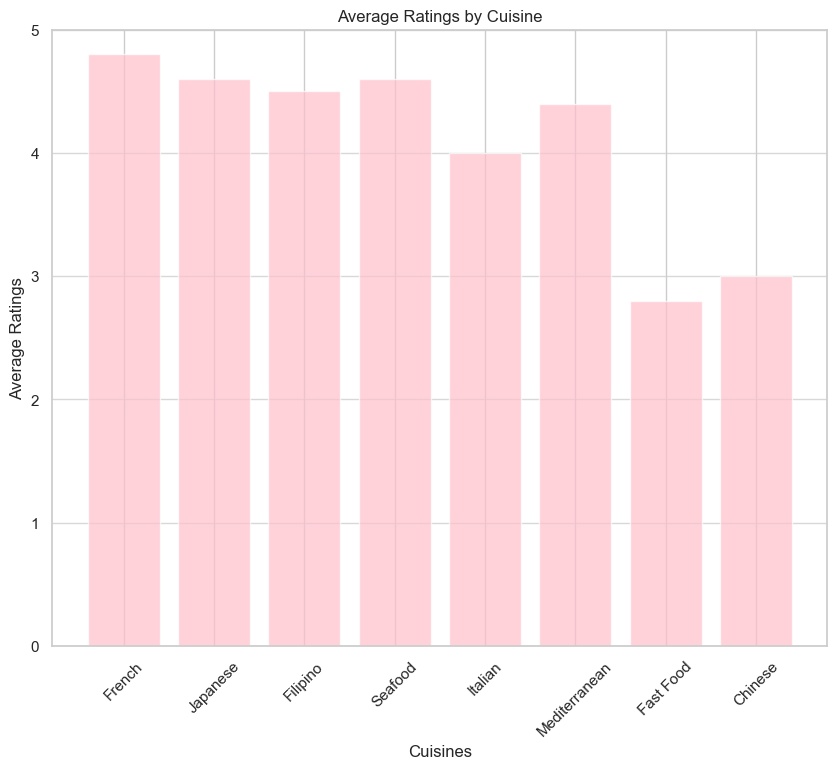

In [157]:
# Sample average ratings data (hypothetical)
cuisines = ['French', 'Japanese', 'Filipino', 'Seafood', 'Italian', 'Mediterranean', 'Fast Food', 'Chinese']
average_ratings = [4.8, 4.6, 4.5, 4.6, 4.0, 4.4, 2.8, 3.0]

# Create bar plot
plt.figure(figsize=(10,8))
plt.bar(cuisines, average_ratings, color='pink', alpha=0.7)
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisines')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Set y-axis limit
plt.grid(axis='y', alpha=0.75)
plt.show()

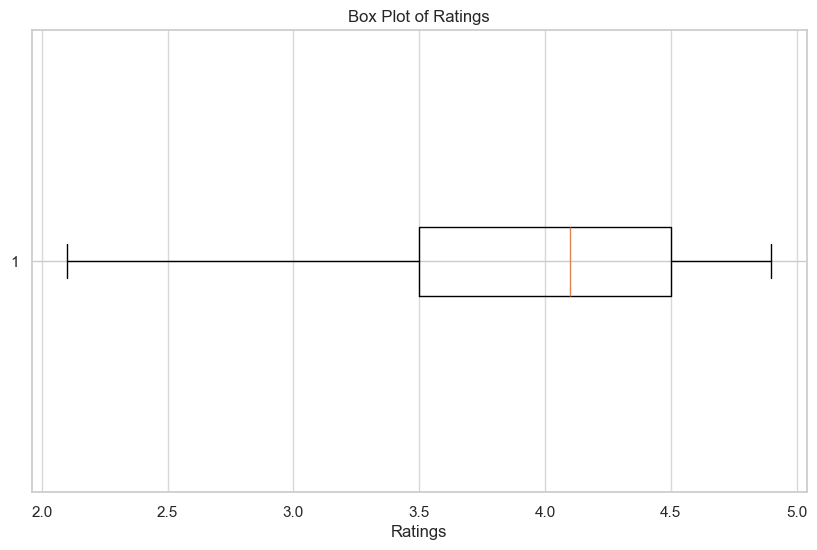

In [161]:
# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(ratings, vert=False)
plt.title('Box Plot of Ratings')
plt.xlabel('Ratings')
plt.grid(axis='x', alpha=0.75)
plt.show()

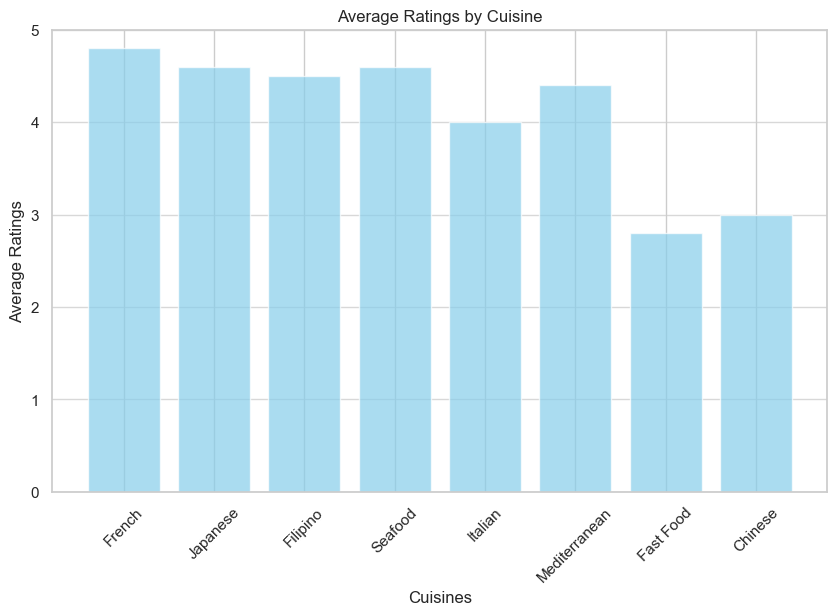

In [163]:
# Sample average ratings data for cuisines (hypothetical)
cuisines = ['French', 'Japanese', 'Filipino', 'Seafood', 'Italian', 'Mediterranean', 'Fast Food', 'Chinese']
average_ratings = [4.8, 4.6, 4.5, 4.6, 4.0, 4.4, 2.8, 3.0]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(cuisines, average_ratings, color='skyblue', alpha=0.7)
plt.title('Average Ratings by Cuisine')
plt.xlabel('Cuisines')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Set y-axis limit
plt.grid(axis='y', alpha=0.75)
plt.show()

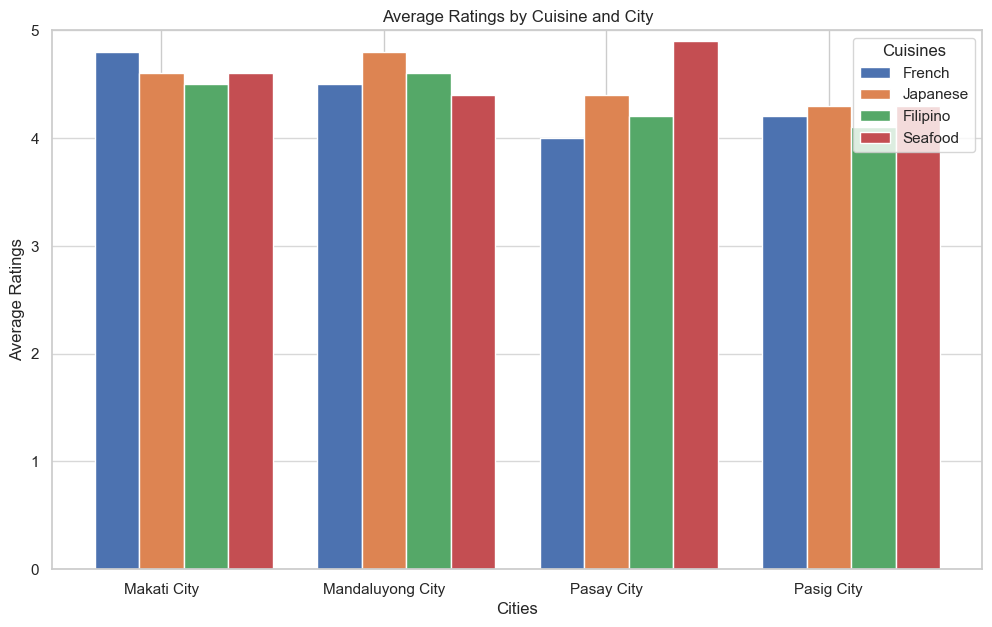

In [165]:
# Sample data for average ratings by city and cuisine (hypothetical)
cities = ['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City']
cuisines_data = {
    'French': [4.8, 4.5, 4.0, 4.2],
    'Japanese': [4.6, 4.8, 4.4, 4.3],
    'Filipino': [4.5, 4.6, 4.2, 4.1],
    'Seafood': [4.6, 4.4, 4.9, 4.3],}

# Set up the bar plot
bar_width = 0.2
x = np.arange(len(cities))

# Create grouped bar plot
plt.figure(figsize=(12, 7))
for i, (cuisine, ratings) in enumerate(cuisines_data.items()):
    plt.bar(x + i * bar_width, ratings, width=bar_width, label=cuisine)

plt.title('Average Ratings by Cuisine and City')
plt.xlabel('Cities')
plt.ylabel('Average Ratings')
plt.xticks(x + bar_width, cities)
plt.ylim(0, 5) 
plt.legend(title='Cuisines')
plt.grid(axis='y', alpha=0.75)
plt.show()

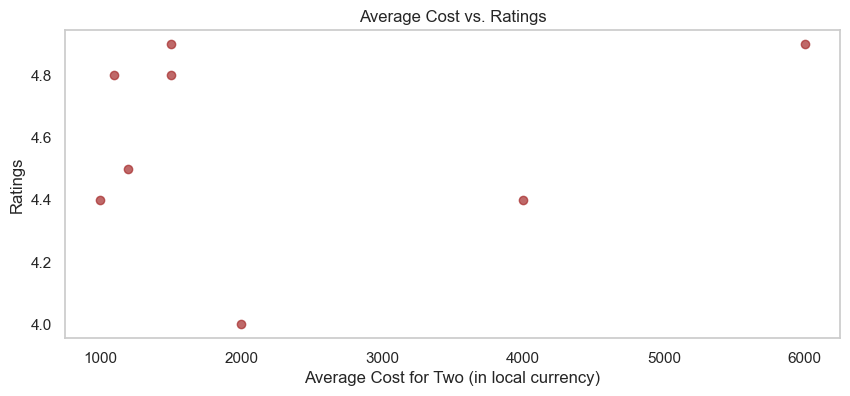

In [169]:
# 1. Scatter Plot: Average Cost vs. Ratings
import matplotlib.pyplot as plt

# Sample data (hypothetical)
average_cost = [1100, 1200, 4000, 1500, 1500, 1000, 2000, 6000]
ratings = [4.8, 4.5, 4.4, 4.9, 4.8, 4.4, 4.0, 4.9]

# Create scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(average_cost, ratings, color='brown', alpha=0.7)
plt.title('Average Cost vs. Ratings')
plt.xlabel('Average Cost for Two (in local currency)')
plt.ylabel('Ratings')
plt.grid()
plt.show()

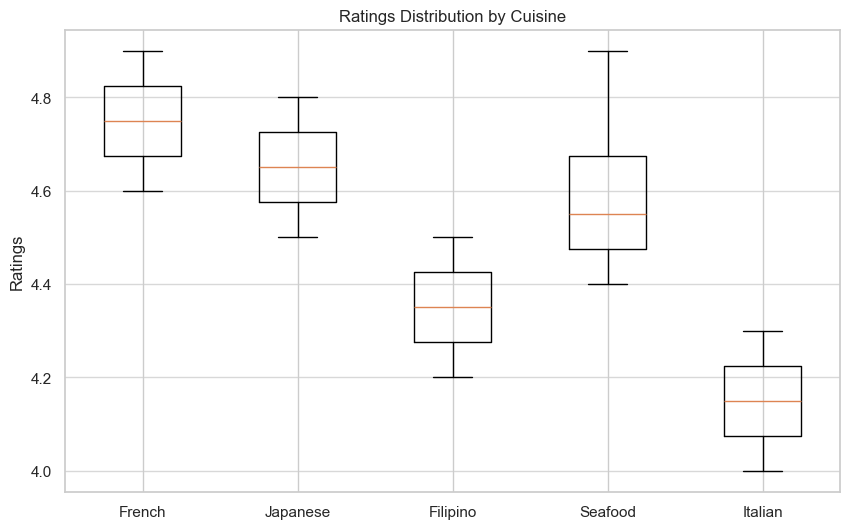

In [171]:
# 2. Box Plot: Ratings by Cuisine
# Sample data for box plot (hypothetical)
cuisines = ['French', 'Japanese', 'Filipino', 'Seafood', 'Italian']
ratings_data = {
    'French': [4.8, 4.7, 4.9, 4.6],
    'Japanese': [4.5, 4.8, 4.6, 4.7],
    'Filipino': [4.4, 4.5, 4.3, 4.2],
    'Seafood': [4.6, 4.4, 4.9, 4.5],
    'Italian': [4.0, 4.1, 4.2, 4.3],
}

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(ratings_data.values(), labels=cuisines)
plt.title('Ratings Distribution by Cuisine')
plt.ylabel('Ratings')
plt.grid(axis='y', alpha=0.75)
plt.show()

#
                                               Thank You